In [17]:
import geopandas as gpd
import numpy as npm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import MultiLineString
import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
CRS_PLOT = 'EPSG:4326'
DATA_DIR = '../data'
EXPORTS_DIR = f'{DATA_DIR}/exports'

zips_gdf = gpd.read_file(f'{DATA_DIR}/ZIP_CODE_040114.shp').to_crs({'init': CRS_PLOT})
lane_gdf = gpd.read_file(f'{DATA_DIR}/lane_fulton_street.geojson').to_crs({'init': CRS_PLOT})
route_gdf = gpd.read_file(f'{DATA_DIR}/b52.geojson').to_crs({'init': CRS_PLOT})

In [3]:
def filter_by_county(df, county):
    return df[df['COUNTY'] == county]

brooklyn_zips_gdf = filter_by_county(zips_gdf, 'Kings')

In [4]:
p1 = Point(route_gdf.geometry[0].coords[60])
lane_line = lane_gdf.iloc[0].geometry
p2 = lane_line.interpolate(lane_line.project(p1))
p1.distance(p2)

THRESHOLD = 0.0001

def get_nearest_point(p):
    return lane_line.interpolate(lane_line.project(p))

def is_on_line(p, line):
    nearest_point = line.interpolate(line.project(p))
    return nearest_point.distance(p) < THRESHOLD

In [5]:
route_points = [Point(p) for p in route_gdf.geometry[0].coords]
lane_points = [p for p in route_points if is_on_line(p, lane_line)]
route_lane = LineString([(p.x, p.y) for p in lane_points])

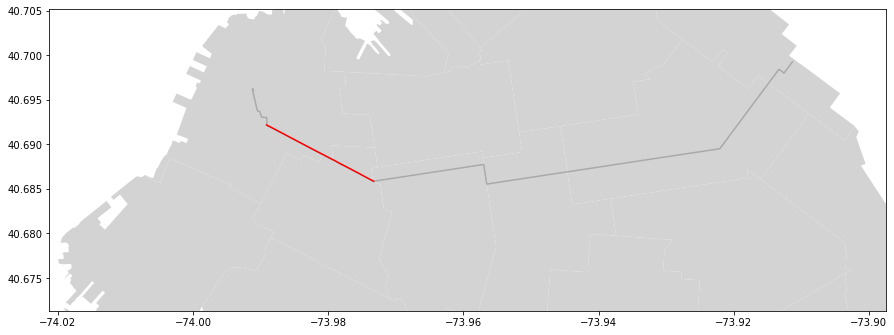

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
minx, miny, maxx, maxy = brooklyn_zips_gdf.geometry.total_bounds
dx = maxx - minx
dy = maxy - miny
ax.set_xlim(minx + 0.1 * dx, maxx - 0.3 * dx)
ax.set_ylim(miny + 0.6 * dy, maxy - 0.2 * dy)

brooklyn_zips_gdf.plot(ax=ax, color='lightgrey')
route_gdf.plot(ax=ax, color='grey', alpha=0.5)
ax.plot(route_lane.xy[0], route_lane.xy[1], color='red')

plt.show()

In [7]:
route_lane.length / route_gdf.geometry[0].length

0.18711852253066047

In [8]:
trajectories_df = pd.read_csv(f'{DATA_DIR}/MTA_bus(1).csv')
trajectories_gdf = gpd.GeoDataFrame(trajectories_df, geometry=gpd.points_from_xy(trajectories_df['longitude'], trajectories_df['latitude']))
trajectories_gdf

,route,x,latitude,longitude,bus_id,datetime,geometry
0,MTA NYCT_M4,0,40.746700,-73.983978,MTA NYCT_4080,Thu Jun 03 23:46:03 CST 2021,POINT (-73.98398 40.74670)
1,MTA NYCT_M116,0,40.797543,-73.931061,MTA NYCT_4082,Thu Jun 03 23:46:04 CST 2021,POINT (-73.93106 40.79754)
2,MTA NYCT_M4,1,40.849041,-73.939087,MTA NYCT_4081,Thu Jun 03 23:45:54 CST 2021,POINT (-73.93909 40.84904)
3,MTA NYCT_M2,1,40.795856,-73.949959,MTA NYCT_4084,Thu Jun 03 23:46:06 CST 2021,POINT (-73.94996 40.79586)
4,MTA NYCT_M11,0,40.782974,-73.978455,MTA NYCT_4083,Thu Jun 03 23:46:03 CST 2021,POINT (-73.97845 40.78297)
...,...,...,...,...,...,...,...
26995,MTA NYCT_BX27,1,40.807537,-73.852257,MTA NYCT_298,Fri Jun 04 02:40:51 CST 2021,POINT (-73.85226 40.80754)
26996,MTA NYCT_Q58,0,40.736073,-73.879303,MTA NYCT_7278,Fri Jun 04 02:41:13 CST 2021,POINT (-73.87930 40.73607)
26997,MTA NYCT_B52,1,40.690731,-73.920822,MTA NYCT_7279,Fri Jun 04 02:40:52 CST 2021,POINT (-73.92082 40.69073)
26998,MTA NYCT_BX17,1,40.809036,-73.916023,MTA NYCT_291,Fri Jun 04 02:41:05 CST 2021,POINT (-73.91602 40.80904)


In [31]:
trajectory_gdf = trajectories_gdf[trajectories_gdf['route'] == 'MTA NYCT_B25']
trajectory_gdf['datetime'] = pd.to_datetime(trajectory_gdf['datetime']) - datetime.timedelta(hours=12)
trajectory_gdf = trajectory_gdf[trajectory_gdf['x'] == 0]
trajectory_gdf = trajectory_gdf[trajectory_gdf['bus_id'] == 'MTA NYCT_4845']
#trajectory_gdf.iloc[55:68]
trajectory_gdf

,route,x,latitude,longitude,bus_id,datetime,geometry
12201,MTA NYCT_B25,0,40.702576,-73.991409,MTA NYCT_4845,2021-06-03 13:03:13,POINT (-73.99141 40.70258)
12498,MTA NYCT_B25,0,40.702648,-73.990692,MTA NYCT_4845,2021-06-03 13:05:28,POINT (-73.99069 40.70265)
12802,MTA NYCT_B25,0,40.703316,-73.992607,MTA NYCT_4845,2021-06-03 13:06:59,POINT (-73.99261 40.70332)
13101,MTA NYCT_B25,0,40.702412,-73.993271,MTA NYCT_4845,2021-06-03 13:09:50,POINT (-73.99327 40.70241)
13396,MTA NYCT_B25,0,40.698799,-73.991425,MTA NYCT_4845,2021-06-03 13:11:53,POINT (-73.99142 40.69880)
13693,MTA NYCT_B25,0,40.696133,-73.989510,MTA NYCT_4845,2021-06-03 13:13:55,POINT (-73.98951 40.69613)
13999,MTA NYCT_B25,0,40.692478,-73.989067,MTA NYCT_4845,2021-06-03 13:15:57,POINT (-73.98907 40.69248)
14298,MTA NYCT_B25,0,40.691608,-73.987793,MTA NYCT_4845,2021-06-03 13:17:58,POINT (-73.98779 40.69161)
14599,MTA NYCT_B25,0,40.691296,-73.986992,MTA NYCT_4845,2021-06-03 13:19:17,POINT (-73.98699 40.69130)
14901,MTA NYCT_B25,0,40.690777,-73.985649,MTA NYCT_4845,2021-06-03 13:22:02,POINT (-73.98565 40.69078)


In [22]:
def is_on_line(p, line):
    nearest_point = line.interpolate(line.project(p))
    return nearest_point.distance(p) < 0.0001

trajectory_points = [Point(p) for p in list(zip(trajectory_gdf['longitude'], trajectory_gdf['latitude']))]
trajectory_lane_tests = [is_on_line(p, lane_line) for p in trajectory_points]
trajectory_lane_points = [p[0] for p in zip(trajectory_points, trajectory_lane_tests) if p[1]]
trajectory_lane_line_string = LineString([(p.x, p.y) for p in trajectory_lane_points])

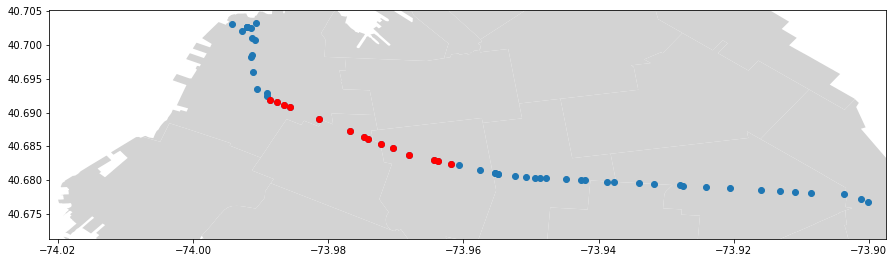

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
minx, miny, maxx, maxy = brooklyn_zips_gdf.geometry.total_bounds
dx = maxx - minx
dy = maxy - miny
ax.set_xlim(minx + 0.1 * dx, maxx - 0.3 * dx)
ax.set_ylim(miny + 0.6 * dy, maxy - 0.2 * dy)

brooklyn_zips_gdf.plot(ax=ax, color='lightgrey')
trajectory_gdf.plot(ax=ax)
ax.scatter(trajectory_lane_line_string.xy[0], trajectory_lane_line_string.xy[1], color='red')

plt.show()

In [12]:
trajectory_gdf[['bus_lane']] = trajectory_lane_tests
trajectory_gdf.head()

,route,x,latitude,longitude,bus_id,datetime,geometry,bus_lane
37,MTA NYCT_B25,0,40.686127,-73.974083,MTA NYCT_7131,Thu Jun 03 23:46:12 CST 2021,POINT (-73.97408 40.68613),True
338,MTA NYCT_B25,0,40.685387,-73.972145,MTA NYCT_7131,Thu Jun 03 23:46:43 CST 2021,POINT (-73.97215 40.68539),True
637,MTA NYCT_B25,0,40.683743,-73.968063,MTA NYCT_7131,Thu Jun 03 23:48:16 CST 2021,POINT (-73.96806 40.68374),True
938,MTA NYCT_B25,0,40.682816,-73.963799,MTA NYCT_7131,Thu Jun 03 23:50:37 CST 2021,POINT (-73.96380 40.68282),True
1238,MTA NYCT_B25,0,40.682163,-73.960648,MTA NYCT_7131,Thu Jun 03 23:52:08 CST 2021,POINT (-73.96065 40.68216),False


In [32]:
trajectory_gdf.to_csv(f'{EXPORTS_DIR}/b25_4845.csv', index=False)

In [14]:
# spatiotemporal matching between a trajectory and its route timetable.